# Oasis Infobyte
# Name : Ajith Singh
# Task1: Iris Flower Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("D:\\Virtual internships\\Oasis Infobyte\\T1\\Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.duplicated().sum()  # No duplicates present in the data

0

In [6]:
df.isnull().sum()  # No null values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [8]:
df.Species.nunique()   # Target variable have three unique values

3

In [9]:
# checking the balanced percentage of target variable 
100*df['Species'].value_counts()/len(df['Species'])
# The data is balanced

Iris-setosa        33.333333
Iris-versicolor    33.333333
Iris-virginica     33.333333
Name: Species, dtype: float64

In [10]:
df.drop(columns="Id",axis=1,inplace=True)

In [11]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
df.median()

C:\Users\ramav\AppData\Local\Temp\ipykernel_16072\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


SepalLengthCm    5.80
SepalWidthCm     3.00
PetalLengthCm    4.35
PetalWidthCm     1.30
dtype: float64

# Exploratory Data Analysis(EDA)  

C:\Users\ramav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalLengthCm'>

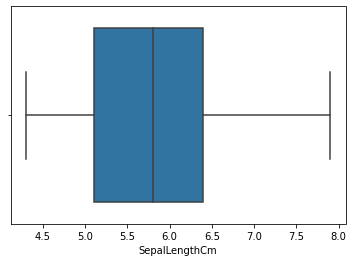

In [14]:
# Checking the outliers
sns.boxplot(df.SepalLengthCm)


C:\Users\ramav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm'>

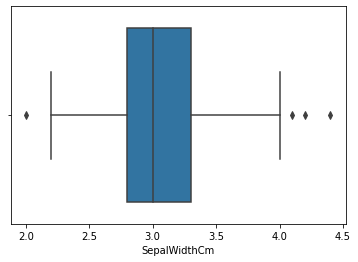

In [15]:
sns.boxplot(df.SepalWidthCm)

C:\Users\ramav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PetalLengthCm'>

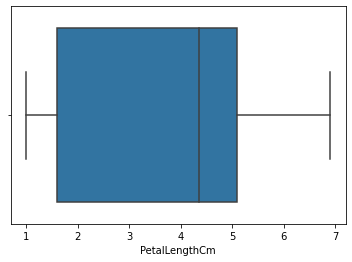

In [16]:
sns.boxplot(df.PetalLengthCm)

C:\Users\ramav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PetalWidthCm'>

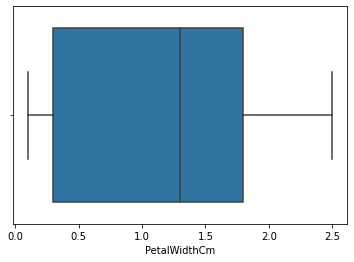

In [17]:
sns.boxplot(df["PetalWidthCm"])

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Count'>

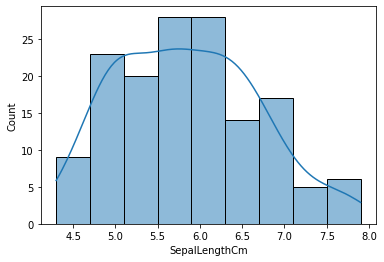

In [18]:
sns.histplot(data=df, x="SepalLengthCm", kde=True)


<AxesSubplot:xlabel='SepalWidthCm', ylabel='Count'>

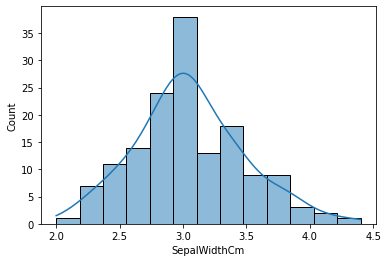

In [19]:
sns.histplot(data=df, x="SepalWidthCm", kde=True)


<AxesSubplot:xlabel='PetalLengthCm', ylabel='Count'>

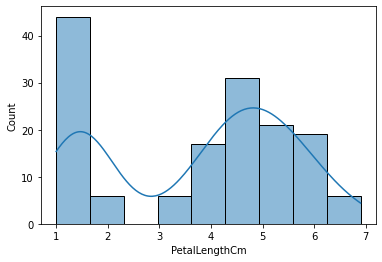

In [20]:
sns.histplot(data=df, x="PetalLengthCm", kde=True)


<AxesSubplot:xlabel='PetalWidthCm', ylabel='Count'>

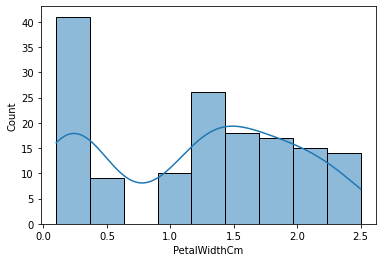

In [21]:
sns.histplot(data=df, x="PetalWidthCm", kde=True)


<AxesSubplot:xlabel='SepalLengthCm', ylabel='Count'>

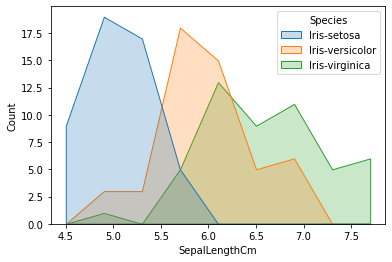

In [22]:
sns.histplot(df, x="SepalLengthCm", hue="Species", element="poly")

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Count'>

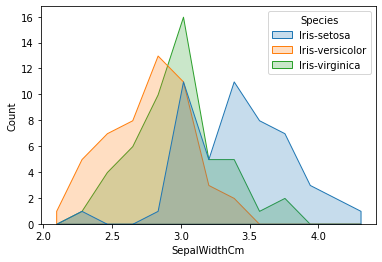

In [23]:
sns.histplot(df, x="SepalWidthCm", hue="Species", element="poly")

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Count'>

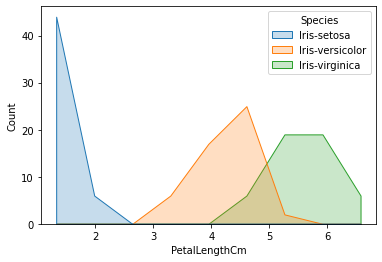

In [24]:
sns.histplot(df, x="PetalLengthCm", hue="Species", element="poly")

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Count'>

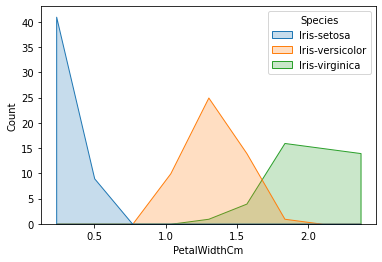

In [25]:
sns.histplot(df, x="PetalWidthCm", hue="Species", element="poly")

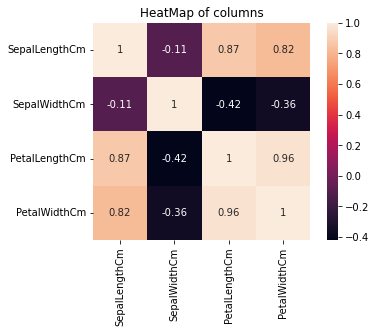

<Figure size 2880x2160 with 0 Axes>

In [26]:
# Checking correlation between dependent and independent variables

correlation = df.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,
            annot=True,square=True)
plt.title("HeatMap of columns")
plt.figure(figsize=(40,30))
plt.show()


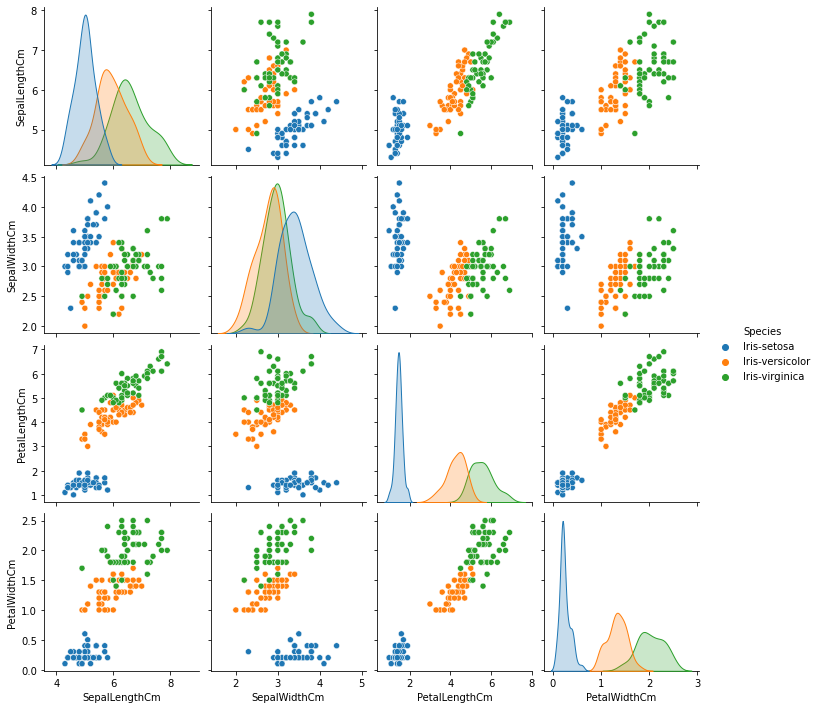

In [27]:
sns.pairplot(df,hue="Species",)

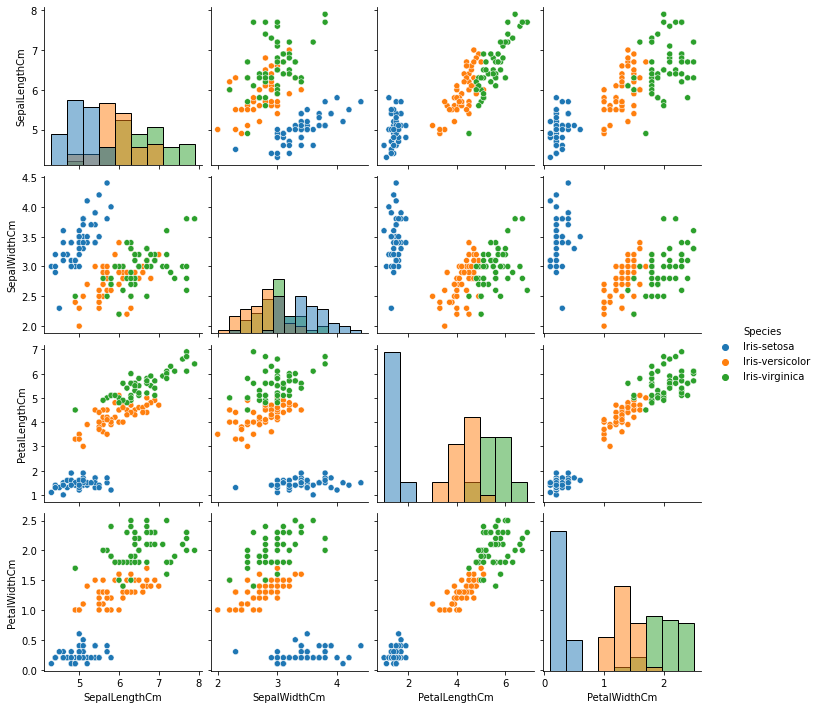

In [28]:
sns.pairplot(df,hue="Species",diag_kind="hist")


# Splitting into dependent and Independent variables

In [29]:
x = df.drop(columns="Species")  # Independent variable

In [30]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
y = df.iloc[:,4]  #dependent variable

In [32]:
y.head(10)

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
6    Iris-setosa
7    Iris-setosa
8    Iris-setosa
9    Iris-setosa
Name: Species, dtype: object

In [33]:
 ## Data preprocessing

In [34]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [35]:
y = LE.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [37]:
print(y_train)

[1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0
 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1
 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 2 0 1 2]


In [38]:
print(y_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [39]:
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
KNC.fit(x_train,y_train)

KNeighborsClassifier()

In [40]:
y_pred_train = KNC.predict(x_train)
y_pred_train

array([1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1,
       2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 0,
       2, 1, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 1, 1,
       2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0,
       2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 1, 0, 1, 2])

In [41]:
y_pred_test = KNC.predict(x_test)
y_pred_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [42]:
# Metrics
from sklearn.metrics import accuracy_score
ac1_knc = accuracy_score(y_train, y_pred_train)
ac2_knc = accuracy_score(y_test, y_pred_test)
print("Training accuracy:", ac1_knc.round(3)*100)
print("Test accuracy:", ac2_knc.round(2)*100)

Training accuracy: 95.19999999999999
Test accuracy: 100.0


In [43]:
# Model evalation: K-Fold METHOD
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5)

results = abs(cross_val_score(KNC, x_train, y_train, cv=kfold,scoring='neg_mean_squared_error'))
print('neg_mean_squared_error:', np.mean(np.sqrt(results).round(3)))

results = abs(cross_val_score(KNC, x_train, y_train, cv=kfold,scoring='accuracy'))
print('accuracy %:',np.mean(results).round(3)*100)


neg_mean_squared_error: 0.2064
accuracy %: 94.3


# Support vector Machine
Linear Kernel

In [44]:
from sklearn.svm import SVC
svc = SVC(kernel="linear",gamma="auto",C=2)
svc.fit(x_train,y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [45]:
y_pred_train_svc = svc.predict(x_train)
y_pred_test_svc = svc.predict(x_test)

In [46]:
# Metrics
from sklearn.metrics import accuracy_score
ac1_svc = accuracy_score(y_train, y_pred_train_svc)
ac2_svc = accuracy_score(y_test, y_pred_test_svc)
print("Training accuracy:", ac1_svc.round(3)*100)
print("Test accuracy:", ac2_svc.round(2)*100)

Training accuracy: 98.1
Test accuracy: 100.0


Polynomial

In [47]:
from sklearn.svm import SVC
svc_poly = SVC(kernel="rbf",gamma="auto",C=2)
svc_poly.fit(x_train,y_train)
y_pred_train_svc_poly = svc_poly.predict(x_train)
y_pred_test_svc_poly = svc_poly.predict(x_test)

In [48]:
# Metrics
from sklearn.metrics import accuracy_score
ac1_svc_poly = accuracy_score(y_train, y_pred_train_svc_poly)
ac2_svc_poly = accuracy_score(y_test, y_pred_test_svc_poly)
print("Training accuracy:", ac1_svc_poly.round(3)*100)
print("Test accuracy:", ac2_svc_poly.round(2)*100)

Training accuracy: 97.1
Test accuracy: 100.0
